 # Tarea 6.5 #
 ### Moisés Echeverría ###
 #### FIS1344 - Métodos númericos y probabilidades ####

Veinte números aleatorios independientes se sacan de una distribución uniforme entre 0 y 1. 

* Use monte carlo para estimar la probabilidad de que la suma de los números esté entre 9 y 10. Ídem entre 15 y 16.

* Use el teorema del límite central y compare con la distribución gaussiana. (Se dice que la gaussiana no describe eventos en las colas.)

Recuerde estimar el error de la simulación, así como cuantificar con errores relativos la diferencia entre la simulación y la gaussiana.

Pista:

$$
\int_0^a dx\,e^{-x^2} = \frac{\sqrt{\pi}}{2}\text{erf}(a)
$$

donde $\text(a)$ es la función de error y en python se puede llamar usando scipy.special.erf del modulo scipy.

In [140]:
import numpy as np #importamos librerias que podriamos utilizar
import random
import matplotlib.pyplot as plt
from scipy import special

In [225]:
n=100000       #Creamos un ciclo que nos genere la suma de 20 terminos entre 0 y 1 repetidas veces
Casos_totales=np.array([sum(np.random.uniform(0,1,20)) for i in range(n)])


In [101]:
def entre_9_y_10(evento):
    """Función que nos entrega los valores que se encuentran entre
    9 y 10, añadiendolos a una lista para trabajar con ellos"""
    Datos=[]
    [Datos.append(n) for n in evento if n>9 and n<10] #ciclo para saber si el número se encuentra entre 9 y 10
    return Datos
    

In [102]:
def entre_15_y_16(evento):
     """Función que nos entrega los valores que se encuentran entre
    15 y 16, añadiendolos a una lista para trabajar con ellos"""
    Datos1=[]
    [Datos1.append(n) for n in evento if n>15 and n<16] #ciclo para saber si el número se encuentra entre 15 y 16
    return Datos1

In [164]:
def Gauss(x,me,std):
    """Función que calcula la Gaussiana que vimos en clases"""
    return np.exp((-(x-me)**2)/(2*std**2))/(np.sqrt(2*np.pi)*std)

In [206]:
D_9_10=len(entre_9_y_10(Casos_totales))    
D_15_16=len(entre_15_y_16(Casos_totales)) #Con los datos obtenidos de las funciones podemos calcular
Prob_9y10=Datos_9_10/len(Casos_totales)   #la probabilidad de obtener numeros entre 9 y 10
print(Prob_9y10)                          #y los números entre 15 y 16
Prob_15_16=Datos_15_16/len(Casos_totales)
print(Prob_15_16)

0.27925
5e-05


Sin embargo este no es necesariamente el valor real de nuestra probabilidad, por lo que, 
para acercarnos
más a este valor real utilizaremos simulaciones de Montecarlo

In [144]:
rep=100000        #repeticiones de la suma
simulaciones=10   #número de veces que se repetira la simulación

Probabilidad_9_10=np.zeros(simulaciones)  #Una matriz vacia donde entraran las probabilidades de obtener entre 9 y 10
Probabilidad_15_16=np.zeros(simulaciones) #Una matriz vacia donde entraran las probabilidades de obtener entre 15 y 16

for n in range(simulaciones):            #un ciclo para repetir la simulación varias veces
    Casos={sum(np.random.uniform(0,1,20)) for i in range(rep)} #todos los valores de las sumas de 20 terminos entre 0 y 1
    Datos_9_10=len(entre_9_y_10(Casos))              
    Probabilidad_9_10[n]=Datos_9_10/len(Casos)     #calculamos las probabilidades de ambos casos
    Datos_15_16=len(entre_15_y_16(Casos))          #entre 9 y 10, y entre 15 y 16
    Probabilidad_15_16[n]=Datos_15_16/len(Casos)

In [268]:
Promedio_9_10=round(Probabilidad_9_10.mean(),5)   #Calculamos los promedios de los datos obtenidos
Desv_est_9_10=round(Probabilidad_9_10.std(),5)    
Promedio_15_16=round(Probabilidad_15_16.mean(),5) #Calculamos las desviaciones estandar de estos datos
Desv_est_15_16=round(Probabilidad_15_16.std(),5)
u=Desv_est_9_10/Promedio_9_10
o=Desv_est_15_16/Promedio_15_16

In [265]:
print(f'La probabilidad de obtener un número entre 9 y 10 al sumar 20 números aleatorios entre 0 y 1 es de',Promedio_9_10)
print(f'La Desviación estandar de la medición entre 9 y 10 es de',Desv_est_9_10)
print(f'La probabilidad de obtener un número entre 15 y 16 al sumar 20 números aleatorios entre 0 y 1 es de',Promedio_15_16)
print(f'La Desviación estandar de la medición entre 15 y 16 es de',Desv_est_15_16)

La probabilidad de obtener un número entre 9 y 10 al sumar 20 números aleatorios entre 0 y 1 es de 0.27982
La Desviación estandar de la medición entre 9 y 10 es de 0.00139
La probabilidad de obtener un número entre 15 y 16 al sumar 20 números aleatorios entre 0 y 1 es de 3e-05
La Desviación estandar de la medición entre 15 y 16 es de 1e-05


In [276]:
Media=Casos_totales.mean()   #Calculamos la media de los datos que definimos al principio para poder hacer la Gausseana
Desv_est=Casos_totales.std() #Calculamos la desviación estandar para la Gausseana
e=Desv_est/Media

Text(0.5, 1.0, 'Distribución de la suma de 20 numeros aleatorios entre 0 y 1')

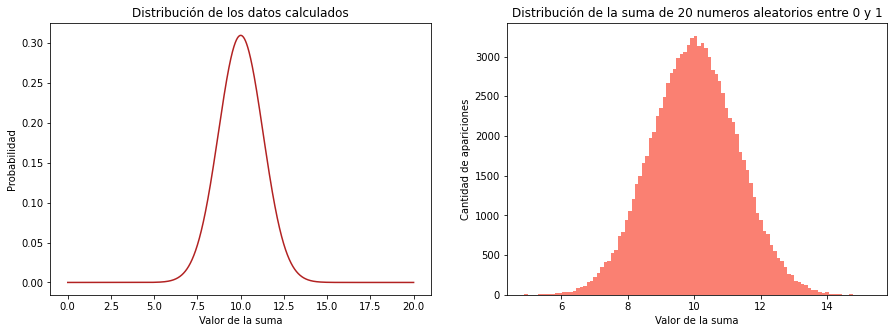

In [261]:
x=np.linspace(0,20,100000)
fig,ax=plt.subplots(1,2,figsize=(15,5))

ax[0].plot(x,Gauss(x,Media,Desv_est),color="firebrick") #Graficamos ambos para poder compararlos
ax[0].set_xlabel("Valor de la suma")
ax[0].set_ylabel("Probabilidad")
ax[0].set_title("Distribución de los datos calculados")

ax[1].hist(Casos_totales,bins=100,color="salmon")
ax[1].set_xlabel("Valor de la suma")
ax[1].set_ylabel("Cantidad de apariciones")
ax[1].set_title("Distribución de la suma de 20 numeros aleatorios entre 0 y 1")


Podemos ver que ambas distribuciones son muy parecidas por lo que el calculo de la Gausseana funciono

In [275]:
Error=(np.sqrt(np.pi)/2*special.erf(Gauss(x,Media,Desv_est))) #Calculamos el error utilizando lo obtenido
#Este nos arroja un array por lo tanto hacemos el promedio de estos valores para obtener el valor general del error
Error1=Error.mean()
print(f'El error que obtenemos de la formula es de',Error1)  

El error que obtenemos de la formula es de 0.04909849540064496


# Calificación: 6.5

Faltó comparar las probabilidades que se pedían entre la aproximación gaussiana y el monte carlo. Esto es importante porque mostraría que la gaussiana no es una buena aproximación cuando las probabilidades son muy pequeñas.